# Importing libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# using scikit-learn toy dataset 
from sklearn.datasets import make_circles

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Splitting the data

In [38]:
np.random.seed(42)
X, y = make_circles(n_samples = 1000, factor=0.1, noise=0.35, random_state=42)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Shape of data
X.shape

(1000, 2)

# Visvualizing with (X's first and second column, color with classes)

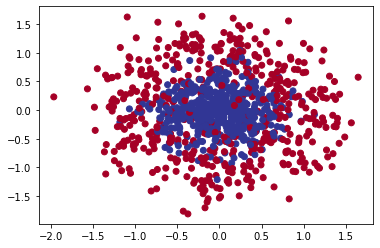

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)
plt.show()

# Fitting the Decision Tree

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

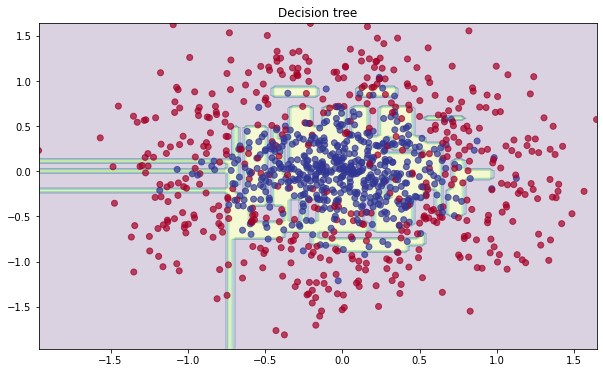

In [54]:
plt.figure(figsize=(10, 6))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dt.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, alpha=.7)
plt.title("Decision tree")
plt.show()

# Observation
* As we can see, Decision tree is trying to learn patterns for each and every point
* This results in it learning the noisy/outlier points
* Which results in model not performing well on testing data (overfitting)
* This usually happens when we have fully grown tree (large depth)
* https://datascience.stackexchange.com/questions/9735/what-is-the-difference-between-fully-developed-decision-trees-and-shallow-dec

# Fitting random forest 

In [ ]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

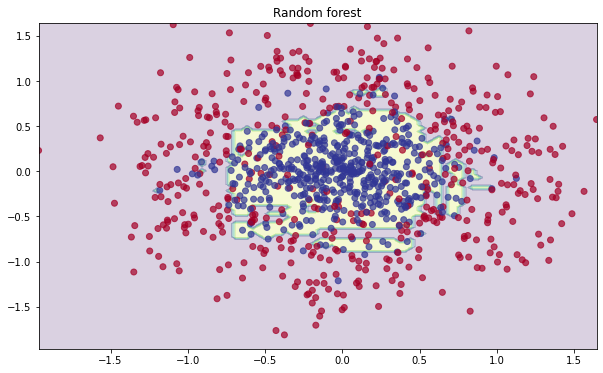

In [40]:
plt.figure(figsize=(10, 6))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, alpha=.7)
plt.title("Random forest")
plt.show()

# Observation

* Here, the learning curves are smoothened meaning it is not trying to learn each and every pattern
* This results in less error on testing data, as the impact of outlier/noisy points is reduced



# Bagging v Random Forest

In [58]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier

In [59]:
X,y = make_classification(n_features=6, n_redundant=0, n_informative=5,n_clusters_per_class=1)

# Created classification data with 7 independent features

In [61]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5','col6'])
df['target'] = y
print(df.shape)
df.head()

(100, 7)


,col1,col2,col3,col4,col5,col6,target
0,1.714527,-2.367655,-1.754801,-0.609954,0.524506,0.762011,0
1,-0.197805,2.527637,1.578884,-2.617603,1.070553,-0.374003,1
2,1.205927,-0.451932,0.379229,-2.629894,1.950700,-1.970714,1
3,-0.370506,1.525234,2.210430,-0.661982,-0.553168,-1.642509,1
4,0.877079,-0.724503,-0.252776,2.210412,1.924562,-1.839495,0


# Fitting on Bagging classifier, take maximum features = 3

In [62]:
bag = BaggingClassifier(max_features=3)

In [63]:
bag.fit(df.iloc[:,:6],df.iloc[:,-1])

BaggingClassifier(max_features=3)

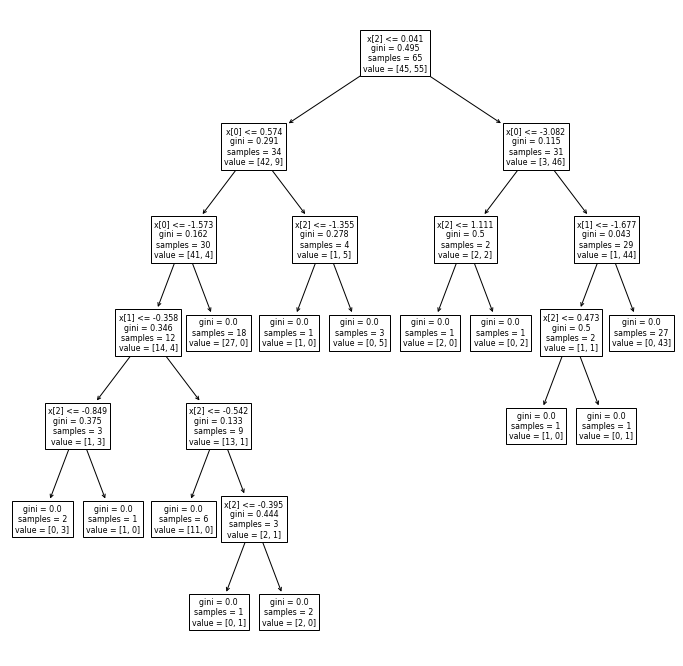

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

# Observation
* As we can see that in the entire tree, bagging took only column 0, column 1, column 2

In [65]:
rf = RandomForestClassifier(max_features=3)

In [66]:
rf.fit(df.iloc[:,:6],df.iloc[:,-1])

RandomForestClassifier(max_features=3)

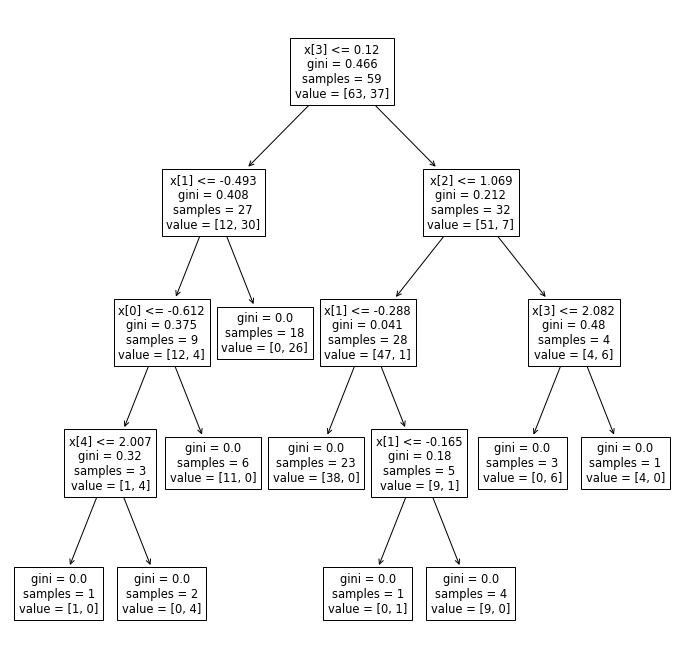

In [67]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

# Observation
* As we can see that in the entire tree, bagging took only column 0, column 1, column 2, column 3 and column 4